**Name**: Matheus Jericó Palhares<br>
**E-mail**: matheusjerico1994@hotmail.com<br>
**LinkedIn**: https://www.linkedin.com/in/matheusjerico<br>

### Data Science Small Test

### 1. Loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

### 2. Loading Dataset

In [2]:
dataset = pd.read_csv("df_points.txt", sep = "\t", index_col=[0])

In [3]:
dataset.head()

,x,y,z,label
0,326.488285,188.988808,-312.205307,0.0
1,-314.287214,307.276723,-179.037412,1.0
2,-328.208910,181.627758,446.311062,1.0
3,-148.658890,147.027947,-27.477959,1.0
4,-467.065931,250.467651,-306.475330,1.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
x        10000 non-null float64
y        10000 non-null float64
z        10000 non-null float64
label    10000 non-null float64
dtypes: float64(4)
memory usage: 390.6 KB


- No **NaN** features, all features is foat64.

In [5]:
dataset.describe()

,x,y,z,label
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.850362,-3.108769,-2.601124,0.502700
std,288.379928,287.120263,290.379789,0.500018
min,-499.802348,-499.899134,-499.952571,0.000000
25%,-249.199895,-248.954580,-258.005693,0.000000
50%,3.663472,-5.446168,-8.221000,1.000000
75%,248.879970,244.395864,252.930406,1.000000
max,499.872453,499.752418,499.872329,1.000000


- Feature's values oscillate between 500 a -500.

### 3. Visualizing data

#### 3.1 Data Distribution and BoxPlot

#### 3.1.1 Feature X

Text(0.5, 1.05, 'Feature X')

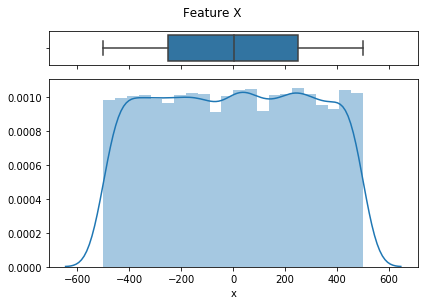

In [6]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["x"], ax=ax_box)
sns.distplot(dataset["x"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Feature X", y = 1.05)

In [7]:
print("Skewness: {}".format(skew(dataset['x'])))
print("Kurtosis: {}".format(kurtosis(dataset['x'])))

Skewness: -0.003793487075166629
Kurtosis: -1.1984099667309176


#### 3.1.2. Feature Y

Text(0.5, 1.05, 'Feature Y')

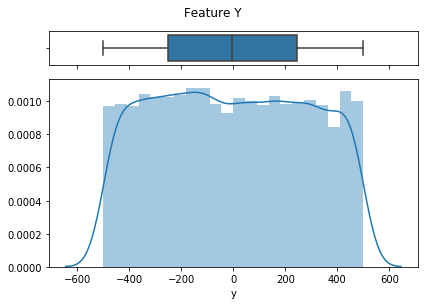

In [8]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["y"], ax=ax_box)
sns.distplot(dataset["y"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Feature Y", y = 1.05)

In [9]:
print("Skewness: {}".format(skew(dataset['y'])))
print("Kurtosis: {}".format(kurtosis(dataset['y'])))

Skewness: 0.02891016663874011
Kurtosis: -1.1902434753600712


#### 3.1.3. Feature Z

Text(0.5, 1.05, 'Feature Z')

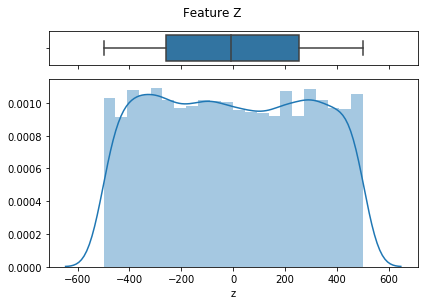

In [28]:
# Construindo duas janelas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Adicionando boxplot e histograma
sns.boxplot(dataset["z"], ax=ax_box)
sns.distplot(dataset["z"], ax=ax_hist)

# Removendo nome do boxplot
ax_box.set(xlabel='')

# Adicionando titulo
f.tight_layout()
f.suptitle("Feature Z", y = 1.05)

In [10]:
print("Skewness: {}".format(skew(dataset['z'])))
print("Kurtosis: {}".format(kurtosis(dataset['z'])))

Skewness: 0.020935683143894546
Kurtosis: -1.2158864778879535


**Analysis:**
    - Features variables have normal distribution.

#### 3.1.4 Target Label

1.0    5027
0.0    4973
Name: label, dtype: int64

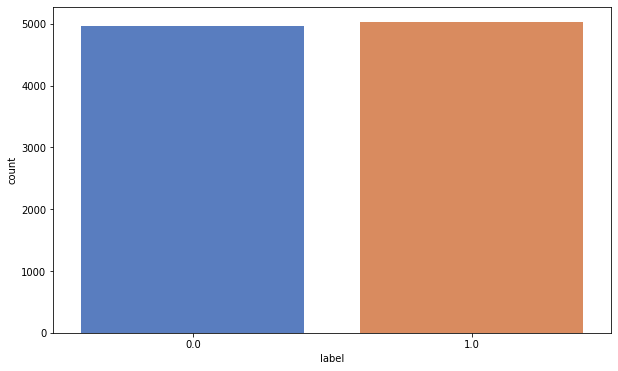

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(dataset["label"], palette="muted")
dataset["label"].value_counts()

**Analysis:**
    - Target variable has balanced distribution.

#### 3.1.5 Features x Label

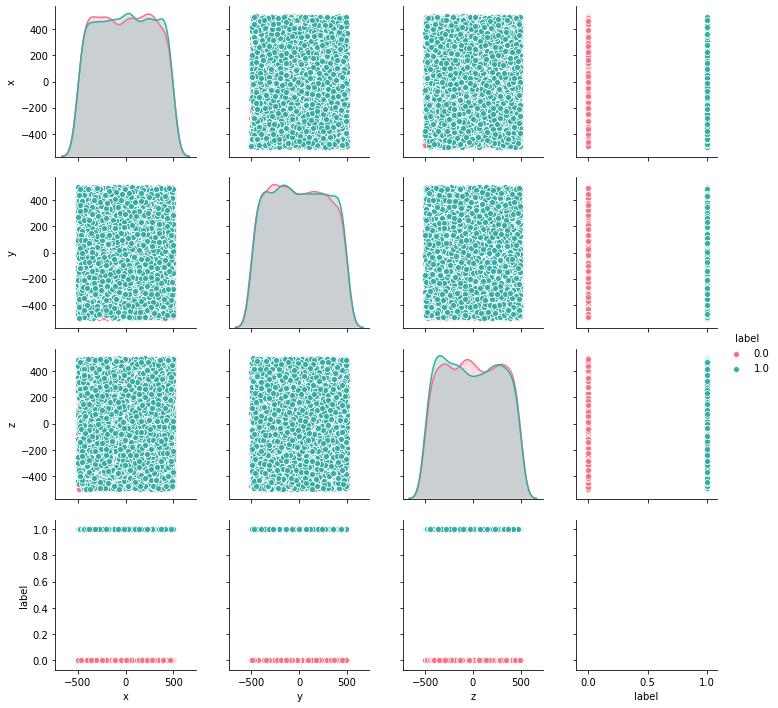

In [12]:
g = sns.pairplot(dataset, hue="label", palette="husl")

### 4. Correlation

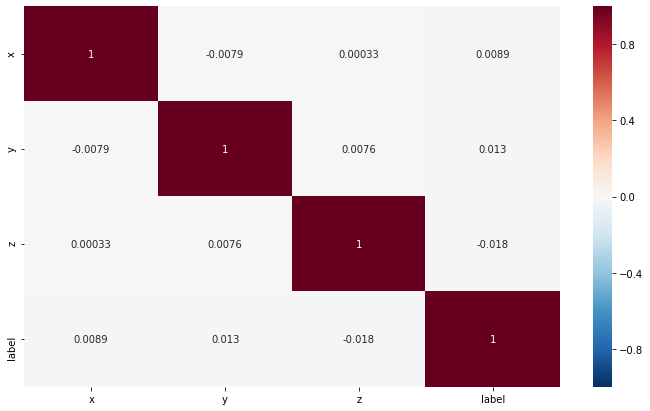

In [13]:
plt.figure(figsize=(12, 7))
heat_map = sns.heatmap(dataset.corr(),annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show(heat_map)

### 5. Segregate a X and y variables

In [14]:
y = dataset['label']
X = dataset.drop(columns= ['label'])

### 6. Voting Classifier
- Selecting machine learning models

In [15]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

modelos = []
modelos.append(("Logistic Regression", LogisticRegression()))
modelos.append(('Naive Bayes', GaussianNB()))
modelos.append(("Gradient Boosting Classifier", GradientBoostingClassifier()))
modelos.append(("Decision Tree", DecisionTreeClassifier()))
modelos.append(("Random Forest", RandomForestClassifier()))
modelos.append(("XGB Classifier", XGBClassifier()))
modelos.append(("AdaBoostClassifier", AdaBoostClassifier()))
modelos.append(('SVC', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.552200 (0.009786)
Naive Bayes: 0.550000 (0.017635)
Gradient Boosting Classifier: 0.580100 (0.053279)
Decision Tree: 0.667100 (0.018609)
Random Forest: 0.777900 (0.011819)
XGB Classifier: 0.582300 (0.040578)
AdaBoostClassifier: 0.505200 (0.018819)
SVC: 0.752400 (0.011586)


**Analysis:**
- The best models for this problem are:
        - Random Forest;
        - SVM.
Selecting **Random Forest**, **SVM** and **Gradient Boosting**, because after tunning with GridSearch, the model Gradient Boost will have good performace.

### 7. Data Manipulation

#### 7.1. Standardize features by removing the mean and scaling to unit variance

In [16]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

#### 7.2. Segregate a test and training frame
- Split arrays or matrices into random train and test subsets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.20)

### 8. Grid Search CV
- GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

#### 8.1. C-Support Vector Classification

In [19]:
# SVC params
grid_svc = {'C':[0.01, 0.1, 1, 10, 100],
            'gamma':['scale', 'auto'],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
# Creating model
svc = SVC()
# Apply GridSearchCV
clf_svc = GridSearchCV(svc, param_grid = grid_svc, cv = 5,  scoring = 'accuracy', n_jobs = -1)
# Train model
clf_svc.fit(X_train, y_train)
# Make preditction
y_pred_svc = clf_svc.predict(X_test)

In [20]:
# Evaluate model SVC
print("Precision, Recall and f1-score:\n{}".format(classification_report(y_test, y_pred_svc)))
print("-----------------------------------------------------------------------------------")
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, y_pred_svc)))
print("-----------------------------------------------------------------------------------")
print("Roc AUC: {}".format(roc_auc_score(y_test, y_pred_svc)))
print("-----------------------------------------------------------------------------------")
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_svc)))

Precision, Recall and f1-score:
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      1010
         1.0       0.76      0.78      0.77       990

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000

-----------------------------------------------------------------------------------
Confusion Matrix: 
[[767 243]
 [217 773]]
-----------------------------------------------------------------------------------
Roc AUC: 0.7701070107010701
-----------------------------------------------------------------------------------
Accuracy: 0.77


#### 8.2. Random Forest Classifier

In [21]:
# Random Forest params
grid_rf = {
    "n_estimators":[10, 100, 200, 500],
    "max_depth": [3, 5, 8, 15, 20],
    "criterion": ["gini", "entropy"],
    "max_features": ['auto', 'sqrt', 'log2']
    }

# Create model
rf = RandomForestClassifier()
# Apply GridSearchCV
clf_rf = GridSearchCV(rf, param_grid = grid_rf, cv=3, scoring = 'accuracy', n_jobs = -1)
# Train model
clf_rf.fit(X_train, y_train)
# Make prediction
y_pred_rf = clf_rf.predict(X_test)

In [22]:
# Evaluate model Random Forest
print("Precision, Recall and f1-score:\n{}".format(classification_report(y_test, y_pred_rf)))
print("-----------------------------------------------------------------------------------")
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, y_pred_rf)))
print("-----------------------------------------------------------------------------------")
print("Roc AUC: {}".format(roc_auc_score(y_test, y_pred_rf)))
print("-----------------------------------------------------------------------------------")
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_rf)))

Precision, Recall and f1-score:
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80      1010
         1.0       0.80      0.78      0.79       990

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000

-----------------------------------------------------------------------------------
Confusion Matrix: 
[[817 193]
 [216 774]]
-----------------------------------------------------------------------------------
Roc AUC: 0.7953645364536454
-----------------------------------------------------------------------------------
Accuracy: 0.7955


#### 8.3. Gradient Boosting Classifier

In [23]:
# GradientBoostingClassifier params
grid_gbc = {
    "loss":["deviance", "exponential"],
    "learning_rate": [0.001, 0.01, 0.1, 1],
    "max_depth":[3, 5, 8, 15, 20],
    "subsample":[0.5, 1.0],
    "max_features":["auto","sqrt","log2"],
    "n_estimators":[10, 100, 200, 500]
    }
# Create model
GBC = GradientBoostingClassifier()
# Apply GridSearchCV
clf_gbc = GridSearchCV(GBC, param_grid = grid_gbc, cv=3, scoring = 'accuracy', verbose=0, n_jobs=-1)
# Train model
clf_gbc.fit(X_train, y_train)
# Make predictions
y_pred_gbc = clf_gbc.predict(X_test)


In [24]:
# Evaluate model Gradient Boosting
print("Precision, Recall and f1-score:\n{}".format(classification_report(y_test, y_pred_gbc)))
print("-----------------------------------------------------------------------------------")
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, y_pred_gbc)))
print("-----------------------------------------------------------------------------------")
print("Roc AUC: {}".format(roc_auc_score(y_test, y_pred_gbc)))
print("-----------------------------------------------------------------------------------")
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_gbc)))

Precision, Recall and f1-score:
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      1010
         1.0       0.81      0.79      0.80       990

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000

-----------------------------------------------------------------------------------
Confusion Matrix: 
[[821 189]
 [203 787]]
-----------------------------------------------------------------------------------
Roc AUC: 0.803910391039104
-----------------------------------------------------------------------------------
Accuracy: 0.804


#### 8.4. Logistic Regression

In [25]:
# SVC params
grid_lr = {'C':[0.01, 0.1, 1, 10, 100],
            'penalty':['l1','l2','elasticnet'],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Creating model
logisticRegression = LogisticRegression()
# Apply GridSearchCV
clf_lr = GridSearchCV(logisticRegression, param_grid = grid_lr, cv = 5,  scoring = 'accuracy', n_jobs = -1)
# Train model
clf_lr.fit(X_train, y_train)
# Make preditction
y_pred_lr = clf_lr.predict(X_test)

In [26]:
# Evaluate model Gradient Boosting
print("Precision, Recall and f1-score:\n{}".format(classification_report(y_test, y_pred_lr)))
print("-----------------------------------------------------------------------------------")
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, y_pred_lr)))
print("-----------------------------------------------------------------------------------")
print("Roc AUC: {}".format(roc_auc_score(y_test, y_pred_lr)))
print("-----------------------------------------------------------------------------------")
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_lr)))

Precision, Recall and f1-score:
              precision    recall  f1-score   support

         0.0       0.58      0.43      0.49      1010
         1.0       0.54      0.68      0.60       990

    accuracy                           0.55      2000
   macro avg       0.56      0.56      0.55      2000
weighted avg       0.56      0.55      0.55      2000

-----------------------------------------------------------------------------------
Confusion Matrix: 
[[432 578]
 [314 676]]
-----------------------------------------------------------------------------------
Roc AUC: 0.5552755275527552
-----------------------------------------------------------------------------------
Accuracy: 0.554


#### 9. Result

- After applying method GridSearchCV to tunning hyperparameters on Support Vector Classification, Gradient Boosting Classifier, Random Forest Classifier and Logistic Regression models, the **Gradient Boosting Classifier** model was evaluated with the best accuracy, presicion, recall and roc_auc metrics. The ensemble models performed much better than the logistic regression.

#### Metrics abaout Gradient Boosting Classifier:


In [27]:
# Evaluate model Gradient Boosting
print("Precision, Recall and f1-score:\n{}".format(classification_report(y_test, y_pred_gbc)))
print("-----------------------------------------------------------------------------------")
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, y_pred_gbc)))
print("-----------------------------------------------------------------------------------")
print("Roc AUC: {}".format(roc_auc_score(y_test, y_pred_gbc)))
print("-----------------------------------------------------------------------------------")
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_gbc)))

Precision, Recall and f1-score:
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      1010
         1.0       0.81      0.79      0.80       990

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000

-----------------------------------------------------------------------------------
Confusion Matrix: 
[[821 189]
 [203 787]]
-----------------------------------------------------------------------------------
Roc AUC: 0.803910391039104
-----------------------------------------------------------------------------------
Accuracy: 0.804
